In [112]:
# Import modules for analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Modules to plot
# Import plotting packages:
from matplotlib import pyplot as plt
import seaborn as sns 

# Import hypothesis-testing functions:
from scipy.stats import ks_2samp, chi2_contingency

# Import preprocessing packages:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# train_test_split
from sklearn.model_selection import train_test_split

# Import classification models
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# import function to create the confusion_matrix
from sklearn.metrics import confusion_matrix 

# Maybe?
from sklearn.linear_model import LogisticRegression

# Import supervised ML classification methods:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Import supervised ML NLP methods:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Import performance-measuring methods:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [113]:
# Define Functions for managing and cleaning data for analysis
def remove_punctuation(text):
    return re.sub(r',|\.|\:|;|-|/|&|!|\?|\(|\)|\+|@','',text)
def remove_HTML(text):
    return re.sub('<.*?>', '', text)
# below is to copy and paste for when I need to clean columns with the text.
# .replace("&rsquo;", "'")
    

In [114]:
# import dataset
profiles = pd.read_csv('profiles.csv')

# begin EDA - Print head and summary statistics 
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [115]:
print(profiles.columns)
print(profiles.info())
# 59946 entries --- 31 columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essa

Goal here is to look at drugs, drinks, smoking, gender(sex), and zodiac (signs) to find trends.
--- drinks_num_scale, drugs_num_scale, smokes_num_scale, sex_binary, zodiac_num_scale, orientation_num_scale ---

In [116]:
# Map values to numerical values with their own columns
profiles["drinks_num_scale"] = profiles.drinks.map({"not at all": 0, "rarely": 1, "socially": 2, "often": 3, \
                                                   "very often": 4, "desperately": 5})
profiles["drugs_num_scale"] = profiles.drugs.map({"never": 0, "sometimes": 1, "often": 2})
profiles["smokes_num_scale"] = profiles.smokes.map({"no": 0, "when drinking": 1, "sometimes": 2, "trying to quit": 3, \
                                                   "yes": 4})
profiles["sex_binary"] = profiles.sex.map({"m": 0, "f": 1})
profiles["orientation_num_scale"] = profiles.orientation.map({"straight": 0, "gay": 1, "bisexual": 2})
# extract zodiac sign from sign column
profiles['sign'] = profiles['sign'].apply(lambda x: str(x).split(" "))
profiles['sign'] = profiles['sign'].apply(lambda x: x[0])
# map sign to numbers
profiles["zodiac_num_scale"] = profiles.sign.map({'aries': 0, 'taurus': 1, 'gemini': 2, 'cancer': 3, 'leo': 4, \
                                                'virgo': 5, 'libra': 6, 'scorpio': 7, 'sagittarius': 8, 'capricorn': 9, 
                                                'aquarius': 10, 'pisces': 11 })


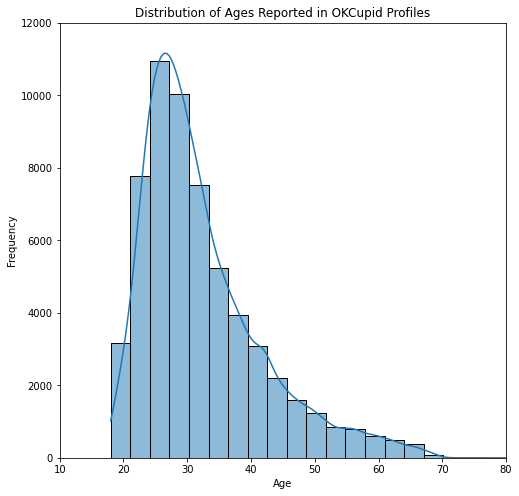

<Figure size 432x288 with 0 Axes>

In [117]:
plt.figure(figsize=(8,8))
sns.histplot(data=profiles, x="age", bins = 30, stat = 'count', \
             kde = True)
plt.axis([10,80,0,12000])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages Reported in OKCupid Profiles')
# plt.savefig('age_distribution.png')
plt.show()
plt.clf()

In [118]:
profiles.sign.value_counts()

nan            11056
leo             4374
gemini          4310
libra           4207
cancer          4206
virgo           4141
taurus          4140
scorpio         4134
aries           3989
pisces          3946
sagittarius     3942
aquarius        3928
capricorn       3573
Name: sign, dtype: int64

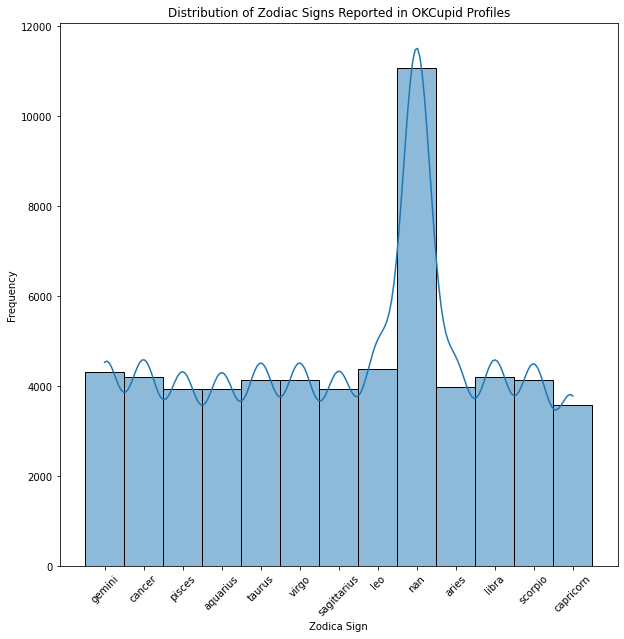

<Figure size 432x288 with 0 Axes>

In [119]:
plt.figure(figsize=(10,10))
# sign_data = profiles.signs
# sign_data.dropna(inplace = True)
sns.histplot(data=profiles, x="sign", bins = 30, stat = 'count', \
             kde = True)
# plt.axis([10,.5,0,12000])
plt.xlabel('Zodica Sign')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Distribution of Zodiac Signs Reported in OKCupid Profiles')
# plt.savefig('sign_distribution.png')
plt.show()
plt.clf()

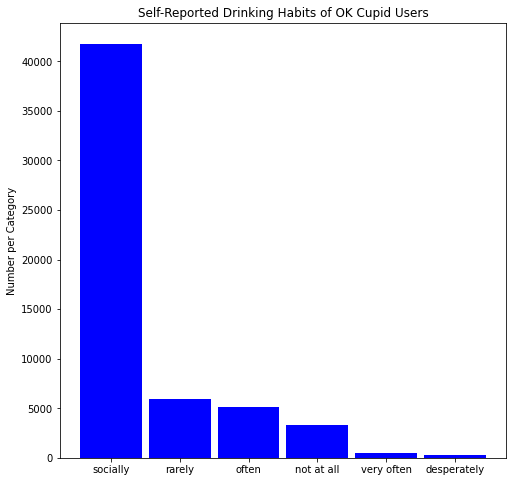

<Figure size 432x288 with 0 Axes>

In [120]:
drinks_data = profiles.drinks
drinks_data.dropna(inplace = True)
plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar([1,2,3,4,5,6],drinks_data.value_counts(), width = 0.9, color = 'blue')
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(["socially", "rarely", "often", "not at all", "very often", "desperately"])
plt.ylabel("Number per Category")
plt.title("Self-Reported Drinking Habits of OK Cupid Users")
# plt.savefig('drinking_bar_graph.png')
plt.show()
plt.clf()

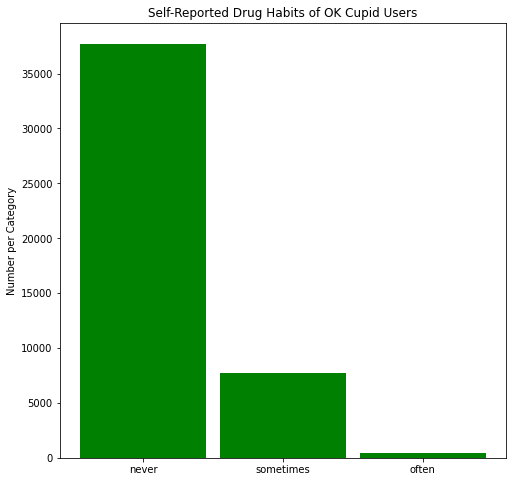

<Figure size 432x288 with 0 Axes>

In [121]:
drugs_data = profiles.drugs
drugs_data.dropna(inplace = True)
plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar([1,2,3],drugs_data.value_counts(), width = 0.9, color = 'green')
ax.set_xticks([1,2,3])
ax.set_xticklabels(["never", "sometimes", "often"])
plt.ylabel("Number per Category")
plt.title("Self-Reported Drug Habits of OK Cupid Users")
# plt.savefig('drugs_bar_graph.png')
plt.show()
plt.clf()

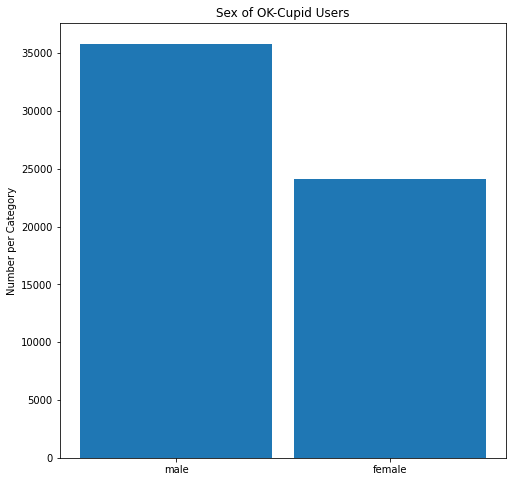

<Figure size 432x288 with 0 Axes>

In [122]:
plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar([1,2],profiles.sex.value_counts(), width = 0.9)
ax.set_xticks([1,2])
ax.set_xticklabels(["male", "female"])
plt.ylabel("Number per Category")
plt.title("Sex of OK-Cupid Users")
# plt.savefig('sex_bar_graph.png')
plt.show()
plt.clf()

In [123]:
male_data = profiles[profiles.sex == 'm']
female_data = profiles[profiles.sex == 'f']

print(len(male_data), len(female_data))
print(male_data.drinks.value_counts())
print(female_data.drinks.value_counts())

35829 24117
socially       24557
rarely          3549
often           3314
not at all      2034
very often       294
desperately      208
Name: drinks, dtype: int64
socially       17223
rarely          2408
often           1850
not at all      1233
very often       177
desperately      114
Name: drinks, dtype: int64


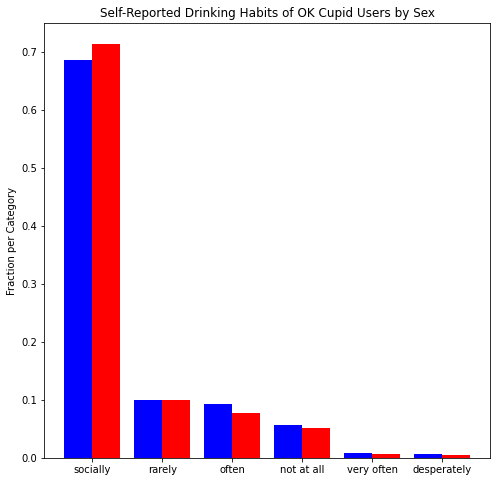

<Figure size 432x288 with 0 Axes>

In [124]:
# The next few lines of code is "borrowed" from Codecademy for making four side-by-side bar plots:
# male data:
n = 1 # This is the first dataset (out of 2) 
t = 2 # Number of data sets 
d = 6 # Number of bars 
w = 0.8 # Width of each bar 
xvalues1 = [t*element + w*n for element in range(d)]
# female data:
n = 2 # This is the second dataset (out of 2) 
t = 2 # Number of data sets 
d = 6 # Number of bars 
w = 0.8 # Width of each bar 
xvalues2 = [t*element + w*n for element in range(d)]

centers = [xvalues1[i]+((xvalues2[i]-xvalues1[i])/2.0) for i in range(len(xvalues1))]

plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar(xvalues1,male_data.drinks.value_counts()/len(male_data), color = 'blue')
plt.bar(xvalues2,female_data.drinks.value_counts()/len(female_data), color = 'red')
ax.set_xticks(centers)
ax.set_xticklabels(["socially", "rarely", "often", "not at all", "very often", "desperately"])
plt.ylabel("Fraction per Category")
plt.title("Self-Reported Drinking Habits of OK Cupid Users by Sex")
# plt.savefig('sex_split_drinking_bar_graph.png')
plt.show()
plt.clf()

In [125]:
print(male_data.drugs.value_counts())
print(female_data.drugs.value_counts())

never        21895
sometimes     5037
often          282
Name: drugs, dtype: int64
never        15829
sometimes     2695
often          128
Name: drugs, dtype: int64


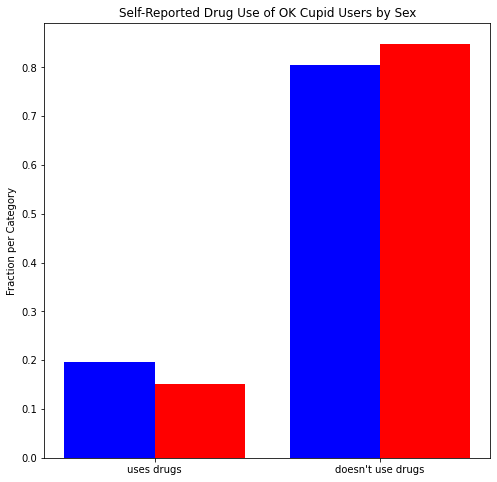

<Figure size 432x288 with 0 Axes>

In [126]:
# The next few lines of code is "borrowed" from Codecademy for making four side-by-side bar plots:
# male data:
n = 1 # This is the first dataset (out of 2) 
t = 2 # Number of data sets 
d = 2 # Number of bars 
w = 0.8 # Width of each bar 
xvalues1 = [t*element + w*n for element in range(d)]
# female data:
n = 2 # This is the second dataset (out of 2) 
t = 2 # Number of data sets 
d = 2 # Number of bars 
w = 0.8 # Width of each bar 
xvalues2 = [t*element + w*n for element in range(d)]

centers = [xvalues1[i]+((xvalues2[i]-xvalues1[i])/2.0) for i in range(len(xvalues1))]

plt.figure(figsize=(8,8))
ax = plt.subplot()
# numbers here are from the male_data/female_data.drugs.value_counts
# the format is:  (sometimes + often)/total, never / total
plt.bar(xvalues1, [(5037+282)/27214,21895/27214], color = 'blue')
plt.bar(xvalues2, [(2695+128)/18652,15829/18652], color = 'red')
ax.set_xticks(centers)
ax.set_xticklabels(["uses drugs", "doesn't use drugs"])
plt.ylabel("Fraction per Category")
plt.title("Self-Reported Drug Use of OK Cupid Users by Sex")
# plt.savefig('sex_split_drug_habits_bar_graph.png')
plt.show()
plt.clf()

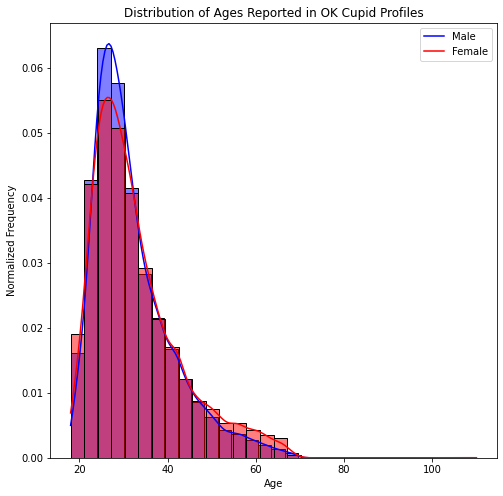

<Figure size 432x288 with 0 Axes>

In [127]:
plt.figure(figsize=(8,8))
sns.histplot(data=male_data, x="age", bins = 30, stat = 'density', \
             kde = True, color = 'blue', alpha = 0.50)
sns.histplot(data=female_data, x="age", bins = 30, stat = 'density', \
             kde = True, color = 'red', alpha = 0.50)
plt.xlabel('Age')
plt.ylabel('Normalized Frequency')
plt.title('Distribution of Ages Reported in OK Cupid Profiles')
plt.legend(['Male', 'Female'])
#plt.savefig('age_distribution.png')
plt.show()
plt.clf()

In [128]:
profiles = profiles.dropna()
data = profiles[['age', 'height', 'income', 'drinks_num_scale', 'drugs_num_scale', 'smokes_num_scale', 'orientation_num_scale',
       'sex_binary']]


labels = profiles[['zodiac_num_scale']]



Find predictability of zodiac signs

In [129]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [130]:
# create a list of models to loop through since we will be using more than one
models = [
    LinearSVC(),
    KNeighborsClassifier(n_neighbors=10),
    RandomForestClassifier(n_estimators=20, random_state=1)
]
for model in models:
    model.fit(X_train, y_train)
    print('{}'.format(model.__class__.__name__))
    print(f'Train score: {round((model.score(X_train, y_train)*100), 2)}%')
    print(f'Test score: {round((model.score(X_test, y_test)*100), 2)}%')
    print('\n')


C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


LinearSVC
Train score: 8.43%
Test score: 9.41%


KNeighborsClassifier
Train score: 26.16%
Test score: 7.48%


RandomForestClassifier
Train score: 85.22%
Test score: 8.05%




C:\Users\pc\AppData\Local\Temp\ipykernel_1316\1773247685.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when

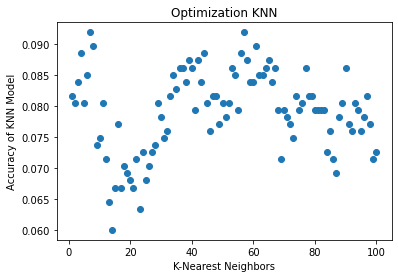

<Figure size 432x288 with 0 Axes>

In [131]:
# optimize KNN

neighbors = 100
scores = []

# loop through and append scores to array for graphing
for n in range(1, neighbors+1):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# graph results to see when our accuracy is highest.
plt.scatter(range(1, neighbors+1), scores)
plt.title('Optimization KNN')
plt.xlabel('K-Nearest Neighbors')
plt.ylabel('Accuracy of KNN Model')
plt.show()
plt.clf()


In [132]:
print(max(scores))

0.09183673469387756


C:\Users\pc\AppData\Local\Temp\ipykernel_1316\3011952275.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\pc\AppData\Local\Temp\ipykernel_1316\3011952275.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\pc\AppData\Local\Temp\ipykernel_1316\3011952275.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\pc\AppData\Local\Temp\ipykernel_1316\3011952275.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\U

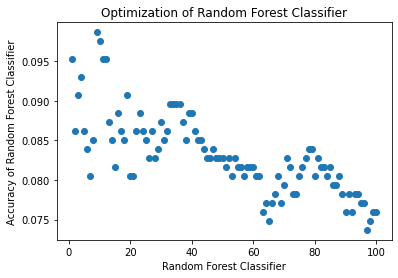

<Figure size 432x288 with 0 Axes>

In [133]:
# Optimize Random Forest Classifier
trees = 100
scores = []

#  loop through and append scores to array for RandomForestClassifier.
for n in range(1, trees + 1):
    forest = RandomForestClassifier(n_estimators=n, random_state=1)
    forest.fit(X_train, y_train)
    scores.append(forest.score(X_test, y_test))

# graph scores
plt.scatter(range(1, trees + 1), scores)
plt.title('Optimization of Random Forest Classifier')
plt.xlabel('Random Forest Classifier')
plt.ylabel('Accuracy of Random Forest Classifier')
plt.show()
plt.clf()

In [134]:
print(max(scores))

0.09863945578231292


In [161]:
# profiles["zodiac_num_scale"] = profiles.sign.map({'aries': 0, 'taurus': 1, 'gemini': 2, 'cancer': 3, 'leo': 4, \
#                                                 'virgo': 5, 'libra': 6, 'scorpio': 7, 'sagittarius': 8, 'capricorn': 9, 
#                                                 'aquarius': 10, 'pisces': 11 })
# knn_labels = profiles["zodiac_num_scale"].map({0: 'aries', 1: 'taurus', 2: 'gemini', 3: 'cancer', 4: 'leo', \
#                                                 5: 'virgo', 6: 'libra', 7: 'scorpio', 8: 'sagittarius', 9: 'capricorn', 
#                                                 10: 'aquarius', 11: 'pisces' })


C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


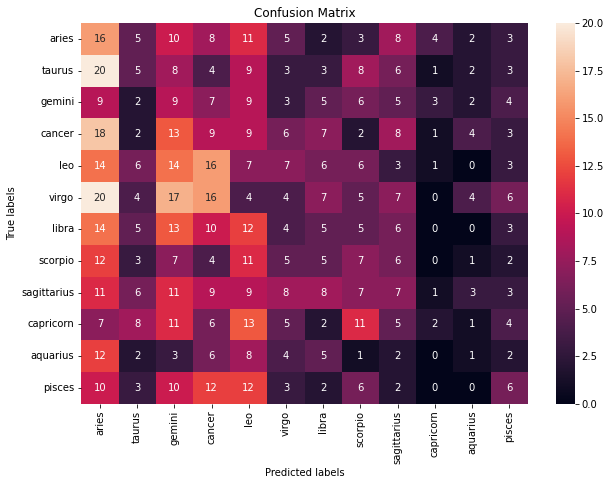

In [162]:
# create the model with optimized # of neighbors and fit
knn = KNeighborsClassifier(n_neighbors=56).fit(X_train, y_train)

# create the confusion_matrix
knn_predict = knn.predict(X_test) 
matrix = confusion_matrix(y_test, knn_predict)

# set up labels for the plot
# knn_labels = knn.classes_
knn_labels = ['aries', 'taurus', 'gemini', 'cancer', 'leo', 'virgo', 'libra', 'scorpio', 'sagittarius', 'capricorn', 'aquarius', 'pisces' ]

# plot the confusion matrix with heatmap for better visibility
plt.figure(figsize=(10,7))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax, fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels)
ax.yaxis.set_ticklabels(knn_labels)

plt.show()

The highest accuracy out of 100 KNN clusters is only 9.18%. Faster Model.
The highest accuracy out of 100 Random Forest Classifiers is 9.86%. Slower Model.
This can conclude that astrology signs are not an indicator of relationships and cannot be predicted based on: 'age', 'height', 'income', 'drinks_num_scale', 'drugs_num_scale', 'smokes_num_scale', 'orientation_num_scale', or 'sex_binary'

This can be assumed as astrology is not logical. 
